In [1]:
import pandas as pd

Quantidade de empresas - ok 
Quantidade de empresas ativas ao longo do tempo - ok

Quantidade de empresas ativas/fechadas ao longo do tempo

Quais as naturezas com mais empresas
Abertas/Fechadas

Quais as cnaes com mais empresas
Abertas/Fechadas

Capital medio/aberta fechada

Qualificação

In [2]:
df_empresas_estab_mg = pd.read_csv("data/df_empresas_estab_mg.csv")
df_naturezas = pd.read_csv("data/Naturezas0.csv")
df_cnaes = pd.read_csv("data/Cnaes0.csv")


Quantidade de empresas, temos 5761705 empresas que foram registradas

In [3]:
df_empresas_estab_mg.shape

(5761705, 14)

Verificando quantas estão ativas vs quantas estão inativas

Nula: Quando a empresa nunca teve sua inscrição no Cadastro Nacional de Pessoa Jurídica (CNPJ) aprovada pela Receita Federal.

Ativa: Quando a empresa está em pleno funcionamento, cumprindo com suas obrigações fiscais e tributárias.

Suspensa: Quando a empresa está temporariamente impedida de exercer suas atividades por algum motivo, como a falta de pagamento de impostos ou a não apresentação de declarações obrigatórias.

Inapta: Quando a empresa perde sua capacidade legal para realizar atividades comerciais, geralmente por não cumprir com suas obrigações fiscais e tributárias ou por não atualizar seus registros na Receita Federal.

Baixada: Quando a empresa encerra suas atividades formalmente e solicita o cancelamento de sua inscrição no CNPJ.





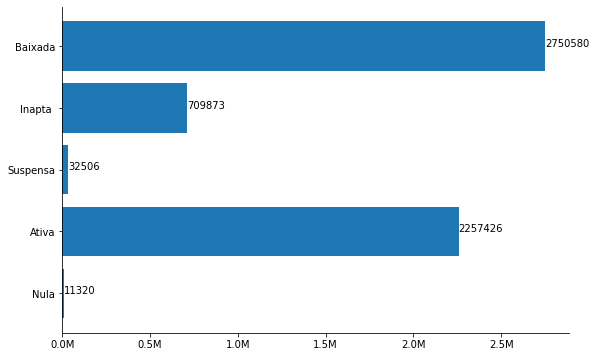

In [4]:
import matplotlib.pyplot as plt

#names = ['1 - Nula', '2 - Ativa', '3 - Suspensa', '4 - Inapta ', '8 - Baixada']
names = ['Nula', 'Ativa', 'Suspensa', 'Inapta ', 'Baixada']
import matplotlib.ticker as ticker

@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1fM" % (x/1E6)


values = df_empresas_estab_mg.groupby('SITUAÇÃO CADASTRAL')['cnpj'].count().values
fig = plt.figure(figsize=(20, 6))
ax=fig.add_subplot(121)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)

ax.barh(names, values)
for i, v in enumerate(values):
    ax.text(v + 3, i , str(v))


Considerando as empresas Baixadas, Inaptas e Suspensas como Inativas e Ativa como ativa, temos o seguinte grafico ao longo do tempo

In [5]:
df_empresas_estab_mg
# df_abertas_fechadas = df_empresas_estab_mg.groupby('SITUAÇÃO CADASTRAL')['cnpj'].count()

,cnpj,NATUREZA,QUALIFICAÇÃO,CAPITAL,PORTE,CNPJ BÁSICO,CNPJ ORDEM,CNPJ DV,IDENTIFICADOR MATRIZ/FILIAL,SITUAÇÃO CADASTRAL,DATA SITUAÇÃO CADASTRAL,DATA DE INÍCIO ATIVIDADE,CNAE FISCAL PRINCIPAL,UF
0,41273709,2135,50,"12000,00",1.0,41273709,1,48,1,2,2021-03-18,2021-03-18,4929901,MG
1,41273730,2135,50,"1000,00",1.0,41273730,1,43,1,2,2021-03-18,2021-03-18,4929901,MG
2,41273737,2135,50,"1000,00",1.0,41273737,1,65,1,3,2022-02-01,2021-03-18,7319002,MG
3,41273747,2135,50,"5000,00",1.0,41273747,1,9,1,2,2021-03-18,2021-03-18,3832700,MG
4,41273748,2135,50,"6000,00",1.0,41273748,1,45,1,8,2022-05-04,2021-03-18,5611201,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761700,41273531,2135,50,"1000,00",1.0,41273531,1,35,1,8,2022-01-12,2021-03-18,4763603,MG
5761701,41273532,2135,50,"5000,00",1.0,41273532,1,80,1,2,2021-03-18,2021-03-18,4930201,MG
5761702,41273551,2135,50,"10000,00",1.0,41273551,1,6,1,8,2021-09-23,2021-03-18,4723700,MG
5761703,41273563,2062,49,"20000,00",1.0,41273563,1,30,1,2,2021-03-18,2021-03-18,8211300,MG


In [44]:
df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE'] = pd.to_datetime(df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE'])
df_count_year = df_empresas_estab_mg[df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE']>'2000-01-01']
df_count_year['y - DATA DE INÍCIO ATIVIDADE'] = df_count_year['DATA DE INÍCIO ATIVIDADE'].dt.strftime("%Y")


C:\Users\leand\anaconda3\envs\botenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Quantidade de empresas que iniciaram a atividade ao longo do tempo a partir do ano 2000

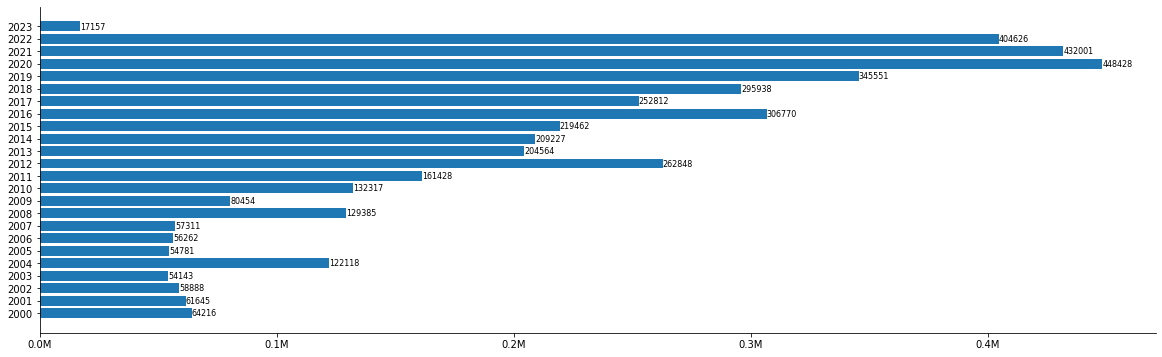

In [45]:
values = df_count_year.groupby(['y - DATA DE INÍCIO ATIVIDADE'])['cnpj'].count()
years = [str(x) for x in range(2000, 2024)]
fig = plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)

ax.barh(years, values)
for i, v in enumerate(values):
    ax.text(v, i - 0.2 , str(v) , fontsize =8)

Fechadas vai ser com situação diferente de ativa e data situação cadastral

In [46]:
df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'] = pd.to_datetime(df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'])

df_count_year = df_empresas_estab_mg[(df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE']>'2000-01-01') & (df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] != 2)]
df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")


C:\Users\leand\anaconda3\envs\botenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


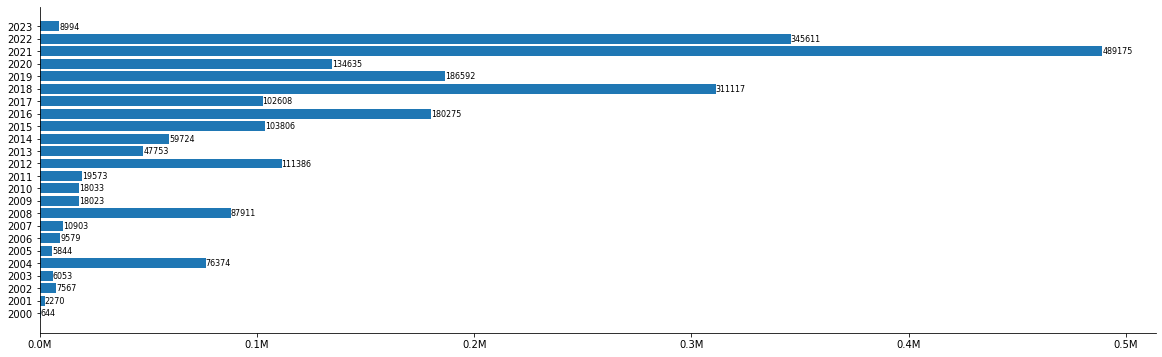

In [47]:
values_close = df_count_year.groupby(['y - DATA SITUAÇÃO CADASTRAL'])['cnpj'].count()
years = [str(x) for x in range(2000, 2024)]
fig = plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)

ax.barh(years, values_close)
for i, v in enumerate(values_close):
    ax.text(v, i - 0.2 , str(v) , fontsize =8)

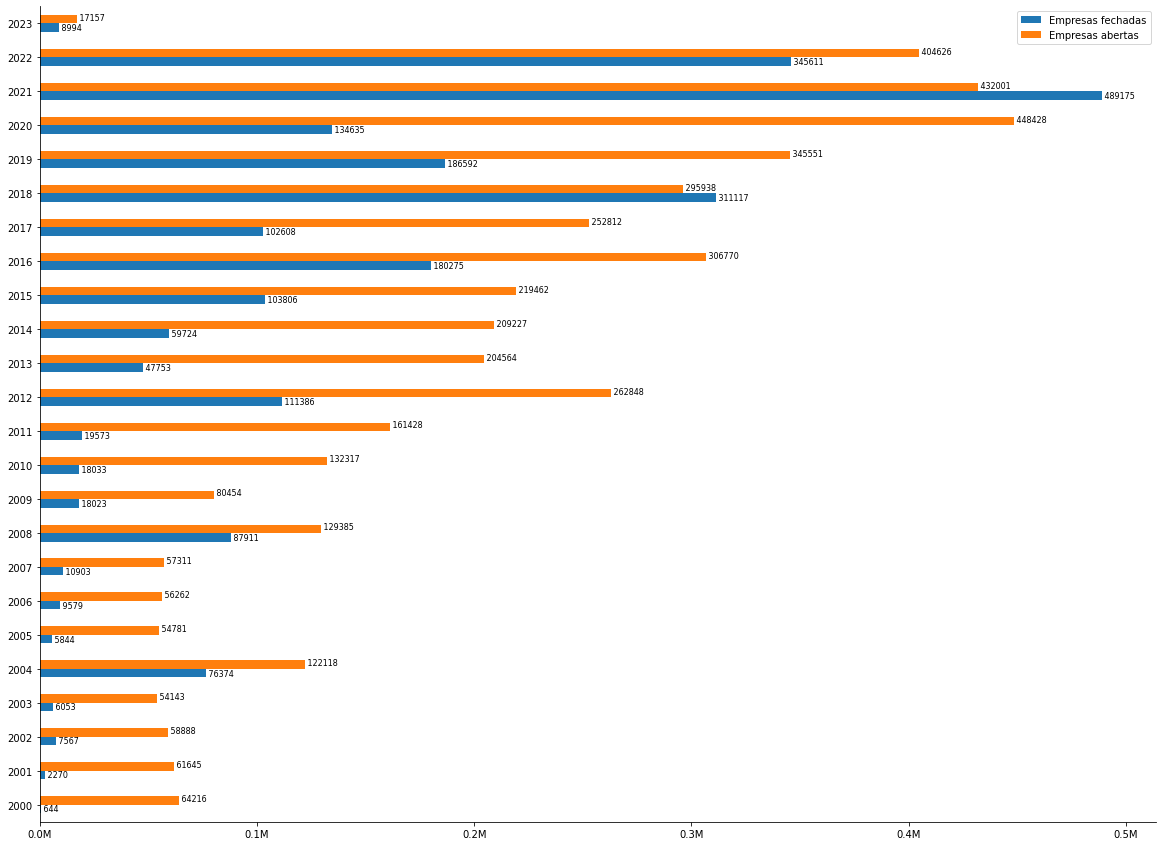

In [70]:
years = [str(x) for x in range(2000, 2024)]

fig = plt.figure(figsize=(20, 15))
ax = plt.gca()

df_plot = pd.DataFrame({'values_close':values_close, 'values':values,'index':years})
df_plot.plot.barh(ax=ax)
ax.legend(["Empresas fechadas", "Empresas abertas"]);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)

for i, v in enumerate(values_close):
    ax.text(v, i - 0.2 , ' '+ str(v) , fontsize=8)
for i, v in enumerate(values):
    ax.text(v, i + 0.1 , ' '+str(v) , fontsize=8)